In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sqlite3
%matplotlib inline

In [2]:
#import df
con = sqlite3.connect('twitter_hate.db')
with sqlite3.connect('twitter_hate.db') as con:
    df = pd.read_sql_query("SELECT * FROM tweets_nlp", con)

In [3]:
df

,index,count,hate_speech,offensive_language,neither,class,tweet,tweet_clean,tweet_lemma,tweet_nouns,tweet_sym,tweet_verbs,tweet_nv,num_tokens
0,17,3,1,2,0,1,""" bitch who do you love """,bitch who do you love,bitch who do -PRON- love,bitch,,love,bitch love,5.0
1,23,3,0,3,0,1,""" fuck no that bitch dont even suck dick "" &#1...",fuck no that bitch dont even suck dick ...,fuck no that bitch do not even suck dick ...,bitch dick kermit video bout,,suck fuck,bitch dick kermit video bout suck fuck,18.0
2,38,3,0,2,1,1,""" lames crying over hoes thats tears of a clown """,lames crying over hoes thats tears of a clown,lame cry over hoe that s tear of a clown,lame hoe tear clown,,cry s,lame hoe tear clown cry s,10.0
3,59,3,0,3,0,1,"""..All I wanna do is get money and fuck model ...",all i wanna do is get money and fuck model bit...,all i wanna do be get money and fuck model bit...,wanna money fuck model bitch russell simmons,,,wanna money fuck model bitch russell simmons,14.0
4,62,3,0,3,0,1,"""@ARIZZLEINDACUT: Females think dating a pussy...",mentionhere females think dating a pussy is c...,mentionhere female think date a pussy be cut...,mentionhere female pussy stuff pussy,,think date urlhere do make,mentionhere female pussy stuff pussy think dat...,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,24771,3,0,3,0,1,you look like your 12 stop talking about fucki...,you look like your stop talking about fucking...,-PRON- look like -PRON- stop talk about fuck...,bitch,,look stop talk fuck,bitch look stop talk fuck,10.0
2856,24776,3,3,0,0,0,you're all niggers,you re all niggers,-PRON- re all nigger,nigger,,re,nigger re,4.0
2857,24777,3,2,1,0,0,you're such a retard i hope you get type 2 dia...,you re such a retard i hope you get type diab...,-PRON- re such a retard i hope -PRON- get type...,retard type diabete sugar rush faggot mentionhere,,re hope get die fuck,retard type diabete sugar rush faggot mentionh...,22.0
2858,24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like i ain...,young buck wanna eat dat nigguh like i be...,young buck wanna dat fuckin,,eat be,young buck wanna dat fuckin eat be,15.0


In [4]:
df.iloc[2827]['tweet_lemma']

'tears     mentionhere   hashtaghere rt mentionhere mentionhere don t call -PRON- sweetie -PRON- fucking retard'

In [5]:
#remove mentions, urls, hashtags, ;&, and 'rt' and other punctuation. keep a count of mentions, urls, hashtags
tweets = df['tweet_lemma']

mentions = []
urls = []
hashtags = []
i = 0
for tweet in tweets:
    tweet = tweet.split()
    mentions.append(tweet.count('mentionhere')+tweet.count('mentionhere:')+tweet.count('"mentionhere:')+tweet.count('&#;mentionhere:'))
    urls.append(tweet.count('urlhere'))
    hashtags.append(tweet.count('hashtaghere'))
    tweet = [token for token in tweet if token not in [';&','']]
    tweet = [token for token in tweet if token not in ['&#;mentionhere:','mentionhere:','"mentionhere:','mentionhere', 'urlhere', 'hashtaghere', 'rt', 'amp']]
    tweet = " ".join(tweet)
    tweets[i] = tweet
    i += 1
    
df['tweet_no_others'] = tweets
df['mention_count'] = mentions
df['url_count'] = urls
df['hashtag_count'] = hashtags

/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [6]:
df.iloc[2827]['tweet_no_others']

'tears don t call -PRON- sweetie -PRON- fucking retard'

In [7]:
sum(count > 0 for count in mentions)

1706

In [8]:
sum(count > 0 for count in urls)

268

In [9]:
sum(count > 0 for count in hashtags)

209

In [10]:
#just to check, find tweets with at least one of each count
mention_bool = df['mention_count'] > 0
url_bool = df['url_count'] > 0
hashtag_bool = df['hashtag_count'] > 0

df[mention_bool & url_bool | mention_bool & hashtag_bool | url_bool & hashtag_bool]

,index,count,hate_speech,offensive_language,neither,class,tweet,tweet_clean,tweet_lemma,tweet_nouns,tweet_sym,tweet_verbs,tweet_nv,num_tokens,tweet_no_others,mention_count,url_count,hashtag_count
4,62,3,0,3,0,1,"""@ARIZZLEINDACUT: Females think dating a pussy...",mentionhere females think dating a pussy is c...,female think date a pussy be cute now how do d...,mentionhere female pussy stuff pussy,,think date urlhere do make,mentionhere female pussy stuff pussy think dat...,22.0,female think date a pussy be cute now how do d...,1,1,0
9,92,3,1,2,0,1,"""@CaelanG15: ""@22EdHam: @CaelanG15 that nigga ...",mentionhere mentionhere mentionhere that ni...,that nigga be eat that hoe lol hell yea lol jo...,mentionhere mentionhere mentionhere nigga hoe ...,,eat say,mentionhere mentionhere mentionhere nigga hoe ...,25.0,that nigga be eat that hoe lol hell yea lol jo...,3,1,0
10,96,3,0,3,0,1,"""@CauseWereGuys: On my way to fuck yo bitch ht...",mentionhere on my way to fuck yo bitch urlher...,on -PRON- way to fuck yo bitch -PRON- as a yea...,mentionhere way fuck yo bitch year,,,mentionhere way fuck yo bitch year,17.0,on -PRON- way to fuck yo bitch -PRON- as a yea...,1,1,0
12,110,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",mentionhere mentionhere you re fucking gay b...,-PRON- re fuck gay blacklist hoe hold out for ...,mentionhere mentionhere hoe,,re fuck blacklist hold,mentionhere mentionhere hoe re fuck blacklist ...,17.0,-PRON- re fuck gay blacklist hoe hold out for ...,2,1,1
17,184,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",mentionhere lmfaoooo i hate black people urlh...,lmfaoooo i hate black people this be why there...,mentionhere lmfaoooo people people nigger,,hate urlhere s,mentionhere lmfaoooo people people nigger hate...,18.0,lmfaoooo i hate black people this be why there...,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,23897,3,2,1,0,0,harm this pussy instead RT @ABC7: missing 26-y...,harm this pussy instead rt mentionhere missin...,harm this pussy instead miss yr old usc medica...,pussy mentionhere yr student tuesday,,harm rt miss see may harm,pussy mentionhere yr student tuesday harm rt m...,21.0,harm this pussy instead miss yr old usc medica...,1,1,0
2787,24179,3,0,3,0,1,lol RT @_mykall: when you @ bae game &amp; an ...,lol rt mentionhere when you bae game amp ...,lol when -PRON- bae game an unknown hoe scream...,lol rt mentionhere bae game amp hoe name loud ...,,scream,lol rt mentionhere bae game amp hoe name loud ...,22.0,lol when -PRON- bae game an unknown hoe scream...,1,1,0
2804,24314,3,2,1,0,0,omg RT @SaddyBey: Fat bitch. What's her @? htt...,omg rt mentionhere fat bitch what s her u...,omg fat bitch what s -PRON-,rt mentionhere fat bitch,,s,rt mentionhere fat bitch s,12.0,omg fat bitch what s -PRON-,1,1,0
2814,24410,3,2,1,0,0,she pooted &#8220;@Not1FuckisGiven: Either You...,she pooted mentionhere either young thug g...,-PRON- poote either young thug gay or this bit...,mentionhere thug gay bitch,,poote poote,mentionhere thug gay bitch poote poote,15.0,-PRON- poote either young thug gay or this bit...,1,1,0


I think more work needs to be done to ensure cleaning is correct but I will write the code for tfidf and ngrams below

In [11]:
corpus = df['tweet_no_others']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

ngram = CountVectorizer(ngram_range=(2,2))
ngram_matrix = ngram.fit_transform(corpus)

ngram_matrix = ngram_matrix.toarray()
vocab = ngram.get_feature_names()
ngrams_df = pd.DataFrame(ngram_matrix, columns=vocab)
ngrams_df

,aa lol,aaaaaaaaand pron,aap be,aaron have,aaronmacgruder stuff,ab pron,ability to,abortion pron,about act,about after,...,zimmerman arrest,zimmerman as,zimmerman jury,zimmerman pron,zimmy attack,zionist be,zoe ask,zog or,zone radius,zoom in
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
ngrams_df['class'] = df['class']

In [14]:
ngrams_offensive = ngrams_df[ngrams_df['class'] == 1]
ngrams_hate = ngrams_df[ngrams_df['class'] == 0]
ngrams_offensive = ngrams_offensive.drop('class', axis='columns')
ngrams_hate = ngrams_hate.drop('class', axis='columns')

<AxesSubplot:>

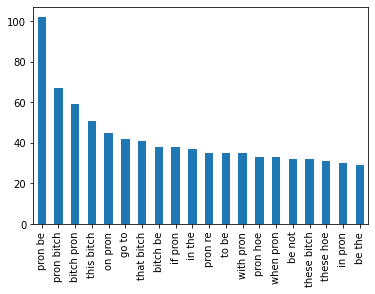

In [15]:
ng_count_off=ngrams_offensive.sum()
ng_off_largest = ng_count_off.nlargest(20)
ng_off_largest.plot(kind='bar')

<AxesSubplot:>

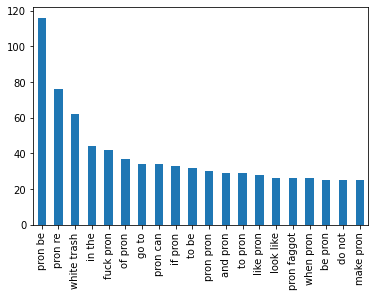

In [16]:
ng_count_hate=ngrams_hate.sum()
ng_hate_largest = ng_count_hate.nlargest(20)
ng_hate_largest.plot(kind='bar')

In [19]:
ngram_3 = CountVectorizer(ngram_range=(3,3))
ngram_3_matrix = ngram_3.fit_transform(corpus)

ngram_3_matrix = ngram_3_matrix.toarray()
vocab = ngram_3.get_feature_names()
ngrams_3_df = pd.DataFrame(ngram_3_matrix, columns=vocab)
ngrams_3_df

,aaaaaaaaand pron begin,aap be maoist,aaron have pron,aaronmacgruder stuff blow,ability to block,abortion pron get,about act pron,about age typical,about all eyebrow,about and coulda,...,zimmerman arrest do,zimmerman as creepy,zimmerman jury ggas,zimmerman pron comin,zimmy attack traytray,zionist be codeword,zoe ask account,zog or the,zone radius around,zoom in pron
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
ngrams_3_df['class'] = df['class']

In [21]:
ngrams_3_offensive = ngrams_3_df[ngrams_df['class'] == 1]
ngrams_3_hate = ngrams_3_df[ngrams_df['class'] == 0]
ngrams_3_offensive = ngrams_3_offensive.drop('class', axis='columns')
ngrams_3_hate = ngrams_3_hate.drop('class', axis='columns')

<AxesSubplot:>

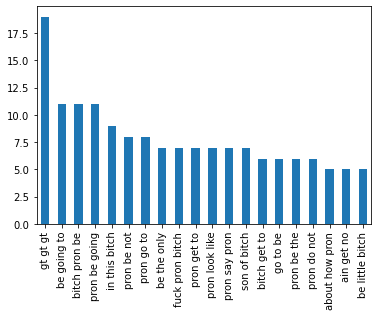

In [22]:
ng3_count_off=ngrams_3_offensive.sum()
ng3_off_largest = ng3_count_off.nlargest(20)
ng3_off_largest.plot(kind='bar')

<AxesSubplot:>

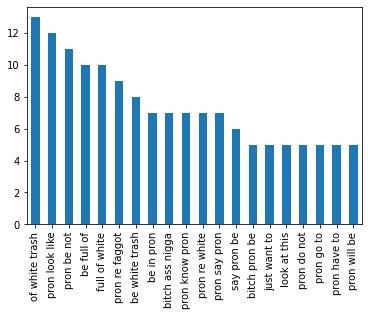

In [24]:
ng3_count_hate=ngrams_3_hate.sum()
ng3_hate_largest = ng3_count_hate.nlargest(20)
ng3_hate_largest.plot(kind='bar')

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tfidfv_matrix = tfidfv.fit_transform(corpus)
tfidfv_matrix = tfidfv_matrix.toarray()

vocab = tfidfv.get_feature_names()
tfidf_df = pd.DataFrame(np.round(tfidfv_matrix, 2), columns=vocab)
tfidf_df

,aa,aaaaaaaaand,aap,aaron,aaronmacgruder,ab,ability,abortion,about,above,...,zimmerman,zimmy,zion,zionist,zipperhead,zoe,zog,zone,zoom,zzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
tfidf_df['class'] = df['class']

In [27]:
tfidf_offensive = tfidf_df[tfidf_df['class'] == 1]
tfidf_hate = tfidf_df[tfidf_df['class'] == 0]
tfidf_offensive = tfidf_offensive.drop('class', axis='columns')
tfidf_hate = tfidf_hate.drop('class', axis='columns')

<AxesSubplot:>

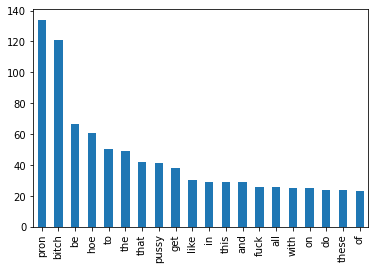

In [28]:
tf_count_off=tfidf_offensive.sum()
tf_off_largest = tf_count_off.nlargest(20)
tf_off_largest.plot(kind='bar')

<AxesSubplot:>

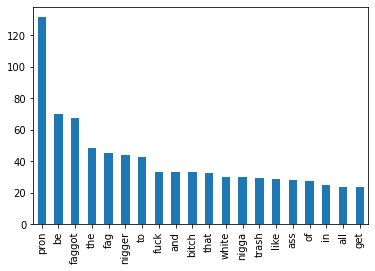

In [29]:
tf_count_hate=tfidf_hate.sum()
tf_hate_largest = tf_count_hate.nlargest(20)
tf_hate_largest.plot(kind='bar')

Aggregate the 3 different dataframes and try out some modeling

In [31]:
#add num_tokens, mention_count, url_count, hashtag_count

new_columns = ['num_tokens', 'mention_count', 'url_count', 'hashtag_count']

for col in new_columns:
    ngrams_df[col] = df[col]
    ngrams_3_df[col] = df[col]
    tfidf_df[col] = df[col]

,aa lol,aaaaaaaaand pron,aap be,aaron have,aaronmacgruder stuff,ab pron,ability to,abortion pron,about act,about after,...,zionist be,zoe ask,zog or,zone radius,zoom in,class,num_tokens,mention_count,url_count,hashtag_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,5.0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,18.0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,10.0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,14.0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,22.0,1,1,0


Start with ngram, n=2

In [32]:
X = ngrams_df.drop('class', axis='columns')
y = ngrams_df['class'].astype(int)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel

In [35]:
gnb = GaussianNB()
param_grid = [{}]
grid_search = GridSearchCV(gnb, 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2)
y_preds = grid_search.fit(X_train, y_train).predict(X_test)

/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   3.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] ................................................. , total=   2.3s
[CV]  ................................................................
[CV] ................................................. , total=   2.3s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.0s finished


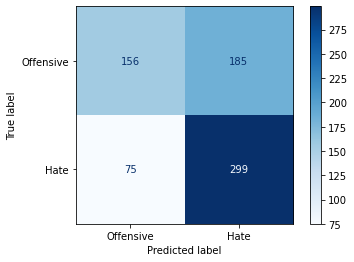

In [36]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['Offensive', 'Hate']
plot_confusion_matrix(grid_search, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [37]:
from sklearn.metrics import classification_report
report = classification_report( y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.46      0.55       341
           1       0.62      0.80      0.70       374

    accuracy                           0.64       715
   macro avg       0.65      0.63      0.62       715
weighted avg       0.65      0.64      0.62       715



In [38]:
from sklearn.svm import SVC
svc = SVC()
param_grid = [{}]
grid_search2 = GridSearchCV(svc, 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2)
y_preds2 = grid_search2.fit(X_train, y_train).predict(X_test)

/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] ................................................. , total= 1.2min
[CV]  ................................................................
[CV] ................................................. , total= 1.2min
[CV]  ................................................................
[CV] ................................................. , total= 1.2min
[CV]  ................................................................
[CV] ................................................. , total= 1.2min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.2min finished


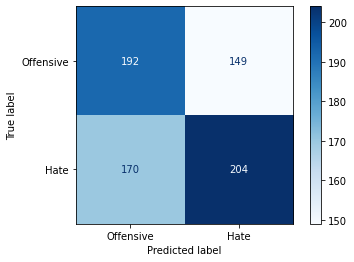

In [39]:
plot_confusion_matrix(grid_search2, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [41]:
report2 = classification_report( y_test, y_preds2)
print(report2)

              precision    recall  f1-score   support

           0       0.53      0.56      0.55       341
           1       0.58      0.55      0.56       374

    accuracy                           0.55       715
   macro avg       0.55      0.55      0.55       715
weighted avg       0.56      0.55      0.55       715



ngram with n=3

In [46]:
X = ngrams_3_df.drop('class', axis='columns')
y = ngrams_3_df['class'].astype(int)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
grid_search3 = GridSearchCV(gnb, 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2)
y_preds3 = grid_search3.fit(X_train, y_train).predict(X_test)

/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   4.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] ................................................. , total=   4.5s
[CV]  ................................................................
[CV] ................................................. , total=   4.4s
[CV]  ................................................................
[CV] ................................................. , total=   4.1s
[CV]  ................................................................
[CV] ................................................. , total=   4.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.6s finished


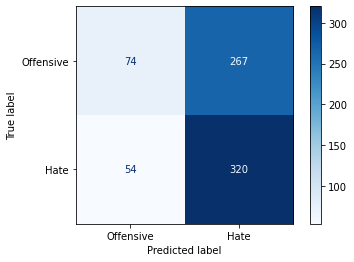

In [51]:
plot_confusion_matrix(grid_search3, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [52]:
report3 = classification_report( y_test, y_preds3)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.46      0.55       341
           1       0.62      0.80      0.70       374

    accuracy                           0.64       715
   macro avg       0.65      0.63      0.62       715
weighted avg       0.65      0.64      0.62       715



In [53]:
grid_search4 = GridSearchCV(svc, 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2)
y_preds4 = grid_search4.fit(X_train, y_train).predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total= 2.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[CV] ................................................. , total= 1.9min
[CV]  ................................................................
[CV] ................................................. , total= 1.9min
[CV]  ................................................................
[CV] ................................................. , total= 1.9min
[CV]  ................................................................
[CV] ................................................. , total= 1.9min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.7min finished


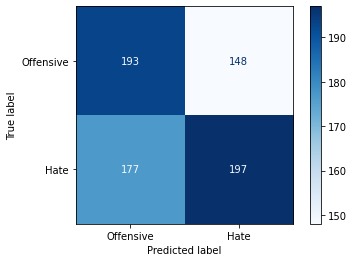

In [54]:
plot_confusion_matrix(grid_search4, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [55]:
report4 = classification_report( y_test, y_preds4)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.46      0.55       341
           1       0.62      0.80      0.70       374

    accuracy                           0.64       715
   macro avg       0.65      0.63      0.62       715
weighted avg       0.65      0.64      0.62       715



Now with tfidf

In [56]:
X = tfidf_df.drop('class', axis='columns')
y = tfidf_df['class'].astype(int)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
grid_search5 = GridSearchCV(gnb, 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2)
y_preds5 = grid_search5.fit(X_train, y_train).predict(X_test)

/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................................................. , total=   0.5s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.5s
[CV]  ................................................................
[CV] ................................................. , total=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished


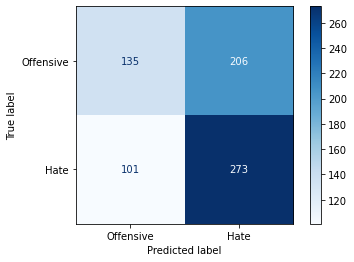

In [59]:
plot_confusion_matrix(grid_search5, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [60]:
report = classification_report( y_test, y_preds5)
print(report)

              precision    recall  f1-score   support

           0       0.57      0.40      0.47       341
           1       0.57      0.73      0.64       374

    accuracy                           0.57       715
   macro avg       0.57      0.56      0.55       715
weighted avg       0.57      0.57      0.56       715



In [61]:
grid_search6 = GridSearchCV(svc, 
                           param_grid,
                           cv=KFold(n_splits=5, 
                                              random_state=42).split(X_train, y_train), 
                           verbose=2)
y_preds6 = grid_search6.fit(X_train, y_train).predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................


/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=  19.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.1s remaining:    0.0s


[CV] ................................................. , total=  19.1s
[CV]  ................................................................
[CV] ................................................. , total=  19.1s
[CV]  ................................................................
[CV] ................................................. , total=  19.1s
[CV]  ................................................................
[CV] ................................................. , total=  19.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


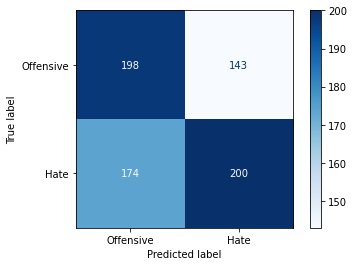

In [62]:
plot_confusion_matrix(grid_search6, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

In [63]:
report = classification_report( y_test, y_preds5)
print(report)

              precision    recall  f1-score   support

           0       0.57      0.40      0.47       341
           1       0.57      0.73      0.64       374

    accuracy                           0.57       715
   macro avg       0.57      0.56      0.55       715
weighted avg       0.57      0.57      0.56       715

